In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
from scipy import stats

In [158]:
df=pd.read_excel('Practical example Confidence intervals.xlsx',sheet_name='Al Bundy');

In [159]:
df.head()

,Inferential statistics. Confidence intervals,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
NaN,Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
NaN,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
NaN,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [160]:
df.columns=df.iloc[2]

In [161]:
df.head()

nan,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,nan,Month,SalePrice
NaN,Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
NaN,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
NaN,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [162]:
df.set_index('InvoiceNo',inplace=True)

In [163]:
df.head()

nan,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,nan,Month,SalePrice
InvoiceNo,,,,,,,,,,,,,
Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [164]:
df.columns.name='Features'
df.columns=df.columns.str.strip()

In [165]:
df.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,nan,Month,SalePrice
InvoiceNo,,,,,,,,,,,,,
Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [166]:
df=df.loc[:,df.columns.notnull()]

In [167]:
df.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Month,SalePrice
InvoiceNo,,,,,,,,,,,,
Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Month,SalePrice
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,1,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,1,159.2


In [168]:
df.drop('Month',axis=1,inplace=True)

In [169]:
df.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2


In [170]:
df.dropna(inplace=True)

In [171]:
df.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0,159


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14968 entries, InvoiceNo to 65777
Data columns (total 11 columns):
Date             14968 non-null object
Country          14968 non-null object
ProductID        14968 non-null object
Shop             14968 non-null object
Gender           14968 non-null object
Size (US)        14968 non-null object
Size (Europe)    14968 non-null object
Size (UK)        14968 non-null object
UnitPrice        14968 non-null object
Discount         14968 non-null object
SalePrice        14968 non-null object
dtypes: object(11)
memory usage: 1.4+ MB


In [173]:
df.drop('InvoiceNo',axis=0,inplace=True)

In [174]:
df.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0,159
52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9,39-40,7,159,0,159


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14967 entries, 52389 to 65777
Data columns (total 11 columns):
Date             14967 non-null object
Country          14967 non-null object
ProductID        14967 non-null object
Shop             14967 non-null object
Gender           14967 non-null object
Size (US)        14967 non-null object
Size (Europe)    14967 non-null object
Size (UK)        14967 non-null object
UnitPrice        14967 non-null object
Discount         14967 non-null object
SalePrice        14967 non-null object
dtypes: object(11)
memory usage: 1.4+ MB


In [176]:
df['Date']=pd.to_datetime(df['Date'])

In [177]:
df['UnitPrice']=pd.to_numeric(df['UnitPrice'],errors='ignore')
df['Discount']=pd.to_numeric(df['Discount'],errors='ignore')
df['SalePrice']=pd.to_numeric(df['SalePrice'],errors='ignore')


In [178]:
df.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0.0,159.0
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,159.0
52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9,39-40,7,159,0.0,159.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14967 entries, 52389 to 65777
Data columns (total 11 columns):
Date             14967 non-null datetime64[ns]
Country          14967 non-null object
ProductID        14967 non-null object
Shop             14967 non-null object
Gender           14967 non-null object
Size (US)        14967 non-null object
Size (Europe)    14967 non-null object
Size (UK)        14967 non-null object
UnitPrice        14967 non-null int64
Discount         14967 non-null float64
SalePrice        14967 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1.4+ MB


In [180]:
df['Gender'].value_counts()

Male      8919
Female    6048
Name: Gender, dtype: int64

In [181]:
df_male=df[df['Gender']=='Male']
df_male.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0.0,159.0
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52394,2014-01-01 15:59:12,United States,2173,US15,Male,10.5,43-44,10,159,0.0,159.0
52396,2014-01-02 09:01:36,Canada,2238,CAN5,Male,10,43,9.5,169,0.0,169.0


In [182]:
df_female=df[df['Gender']=='Female']
df_female.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,159.0
52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9,39-40,7,159,0.0,159.0
52395,2014-01-02 01:06:24,Germany,2200,GER2,Female,9,39-40,7,179,0.0,179.0
52398,2014-01-02 13:35:12,United Kingdom,2237,UK1,Female,9,39-40,7,149,0.0,149.0
52399,2014-01-02 14:18:24,United States,2213,US11,Female,9.5,40,7.5,169,0.1,152.1


In [183]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8919 entries, 52389 to 65775
Data columns (total 11 columns):
Date             8919 non-null datetime64[ns]
Country          8919 non-null object
ProductID        8919 non-null object
Shop             8919 non-null object
Gender           8919 non-null object
Size (US)        8919 non-null object
Size (Europe)    8919 non-null object
Size (UK)        8919 non-null object
UnitPrice        8919 non-null int64
Discount         8919 non-null float64
SalePrice        8919 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 836.2+ KB


In [184]:
df_sales=df_male.groupby(['Size (US)','Country']).agg({'Country':'count'})

In [185]:
df_sales

Country
Size (US) Country                
6.0       Canada               15
          Germany              30
          United Kingdom        6
          United States        54
6.5       Canada               15
          Germany              18
          United Kingdom       12
          United States        45
7.0       Canada               24
          Germany              30
          United Kingdom       21
          United States        39
7.5       Canada               45
          Germany              48
          United Kingdom       12
          United States        66
8.0       Canada               51
          Germany             117
          United Kingdom       45
          United States       141
8.5       Canada              192
          Germany             174
          United Kingdom       87
          United States       225
9.0       Canada              324
          Germany             348
          United Kingdom      183
          United States       492
9.5       Canada              375
          Germany             549
...                           ...
10.0      United Kingdom      156
          United States       543
10.5      Canada              243
          Germany             453
          United Kingdom      150
          United States       462
11.0      Canada              114
          Germany             156
          United Kingdom       69
          United States       213
11.5      Canada               75
          Germany             129
          United Kingdom       39
          United States       156
12.0      Canada               51
          Germany              78
          United Kingdom       24
          United States        87
13.0      Canada               12
          Germany              33
          United Kingdom        3
          United States        39
14.0      Canada               21
          Germany              30
          United Kingdom       15
          United States        60
15.0      Canada               27
          Germany              48
          United Kingdom       12
          United States        24

[64 rows x 1 columns]

In [186]:
df_sales=df_sales.unstack()

In [187]:
df_sales

Country                                     
Country    Canada Germany United Kingdom United States
Size (US)                                             
6.0            15      30              6            54
6.5            15      18             12            45
7.0            24      30             21            39
7.5            45      48             12            66
8.0            51     117             45           141
8.5           192     174             87           225
9.0           324     348            183           492
9.5           375     549            225           741
10.0          237     411            156           543
10.5          243     453            150           462
11.0          114     156             69           213
11.5           75     129             39           156
12.0           51      78             24            87
13.0           12      33              3            39
14.0           21      30             15            60
15.0           27      48             12            24

In [188]:
df_men_US=df_male[df_male['Country']=='United States']

In [189]:
df_men_US.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52394,2014-01-01 15:59:12,United States,2173,US15,Male,10.5,43-44,10,159,0.0,159.0
52397,2014-01-02 09:16:00,United States,2191,US13,Male,10.5,43-44,10,139,0.0,139.0
52399,2014-01-02 14:18:24,United States,2197,US1,Male,10,43,9.5,129,0.0,129.0
52400,2014-01-02 15:59:12,United States,2152,US15,Male,8,41,7.5,139,0.0,139.0


In [190]:
df_men_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 52390 to 65772
Data columns (total 11 columns):
Date             3387 non-null datetime64[ns]
Country          3387 non-null object
ProductID        3387 non-null object
Shop             3387 non-null object
Gender           3387 non-null object
Size (US)        3387 non-null object
Size (Europe)    3387 non-null object
Size (UK)        3387 non-null object
UnitPrice        3387 non-null int64
Discount         3387 non-null float64
SalePrice        3387 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 317.5+ KB


In [191]:
df_men_US_16=df_men_US[df_men_US['Date'].apply(lambda d:d.year==2016)]

In [192]:
df_men_US_16.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
59213,2016-01-02 16:13:36,United States,2228,US13,Male,9.5,42-43,9,179,0.3,125.3
59214,2016-01-02 16:56:48,United States,2236,US6,Male,8.5,41-42,8,189,0.2,151.2
59223,2016-01-03 13:20:48,United States,2158,US3,Male,8,41,7.5,159,0.0,159.0
59225,2016-01-03 13:49:36,United States,2236,US13,Male,8,41,7.5,129,0.0,129.0
59226,2016-01-03 16:56:48,United States,2207,US14,Male,14,47,13.5,169,0.0,169.0


In [193]:
df_men_US_16_mon=df_men_US_16.groupby([df_men_US_16['Date'].dt.strftime('%B'),'Size (US)']).agg({'Size (US)':'count'}).unstack().transpose()

In [194]:
df_men_US_16_mon.fillna(0,inplace=True)

In [195]:
df_men_US_16_mon.columns.name='Months 2016'

In [196]:
df_men_US_16_mon

Months 2016          April  August  December  February  January  July  June  \
          Size (US)                                                           
Size (US) 6.0          1.0     4.0       0.0       1.0      4.0   3.0   3.0   
          6.5          1.0     7.0       1.0       2.0      3.0   1.0   0.0   
          7.0          0.0     2.0       0.0       0.0      0.0   4.0   4.0   
          7.5          1.0     3.0       1.0       2.0      3.0   7.0   0.0   
          8.0          3.0     4.0       6.0       9.0      7.0   9.0   2.0   
          8.5          8.0    17.0       6.0      12.0     12.0  17.0   9.0   
          9.0         11.0    30.0      10.0      13.0     17.0  25.0  22.0   
          9.5         24.0    47.0      26.0      25.0     19.0  25.0  33.0   
          10.0        19.0    24.0      20.0      26.0     17.0  25.0  31.0   
          10.5        14.0    15.0      10.0      16.0     13.0  18.0  19.0   
          11.0        10.0     8.0       7.0      16.0      5.0  15.0  11.0   
          11.5         3.0     4.0       5.0       3.0      4.0   6.0   5.0   
          12.0         4.0    12.0       1.0       0.0      3.0   3.0   4.0   
          13.0         0.0     0.0       2.0       1.0      1.0   1.0   2.0   
          14.0         3.0     1.0       1.0       6.0      2.0   2.0   3.0   
          15.0         1.0     0.0       2.0       0.0      0.0   4.0   0.0   

Months 2016          March   May  November  October  September  
          Size (US)                                             
Size (US) 6.0          3.0   3.0       3.0      7.0        3.0  
          6.5          0.0   0.0       2.0      1.0        2.0  
          7.0          1.0   6.0       0.0      0.0        3.0  
          7.5          3.0   7.0       1.0      6.0        4.0  
          8.0          7.0  12.0       2.0      5.0        7.0  
          8.5          8.0  15.0      10.0      9.0        6.0  
          9.0         13.0  21.0      13.0     25.0       26.0  
          9.5         27.0  26.0      37.0     44.0       31.0  
          10.0        26.0  16.0      15.0     31.0       23.0  
          10.5        22.0  28.0      16.0     21.0       19.0  
          11.0        13.0  10.0       6.0      7.0        9.0  
          11.5         6.0   3.0      13.0     12.0        5.0  
          12.0         0.0   4.0       2.0      9.0        4.0  
          13.0         2.0   3.0       3.0      4.0        0.0  
          14.0         3.0   5.0       2.0      1.0        0.0  
          15.0         0.0   1.0       0.0      0.0        0.0

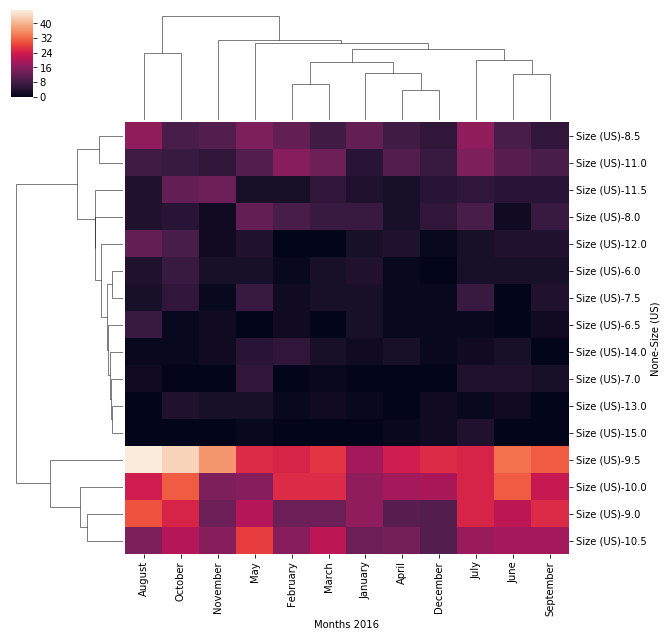

In [197]:
sns.clustermap(df_men_US_16_mon)

In [198]:
def calculate_sem(row):
    return stats.sem(row)

In [199]:
df_men_US_16_mon['SEM']=df_men_US_16_mon.apply(calculate_sem,axis=1)

In [200]:
df_men_US_16_mon

Months 2016          April  August  December  February  January  July  June  \
          Size (US)                                                           
Size (US) 6.0          1.0     4.0       0.0       1.0      4.0   3.0   3.0   
          6.5          1.0     7.0       1.0       2.0      3.0   1.0   0.0   
          7.0          0.0     2.0       0.0       0.0      0.0   4.0   4.0   
          7.5          1.0     3.0       1.0       2.0      3.0   7.0   0.0   
          8.0          3.0     4.0       6.0       9.0      7.0   9.0   2.0   
          8.5          8.0    17.0       6.0      12.0     12.0  17.0   9.0   
          9.0         11.0    30.0      10.0      13.0     17.0  25.0  22.0   
          9.5         24.0    47.0      26.0      25.0     19.0  25.0  33.0   
          10.0        19.0    24.0      20.0      26.0     17.0  25.0  31.0   
          10.5        14.0    15.0      10.0      16.0     13.0  18.0  19.0   
          11.0        10.0     8.0       7.0      16.0      5.0  15.0  11.0   
          11.5         3.0     4.0       5.0       3.0      4.0   6.0   5.0   
          12.0         4.0    12.0       1.0       0.0      3.0   3.0   4.0   
          13.0         0.0     0.0       2.0       1.0      1.0   1.0   2.0   
          14.0         3.0     1.0       1.0       6.0      2.0   2.0   3.0   
          15.0         1.0     0.0       2.0       0.0      0.0   4.0   0.0   

Months 2016          March   May  November  October  September       SEM  
          Size (US)                                                       
Size (US) 6.0          3.0   3.0       3.0      7.0        3.0  0.514315  
          6.5          0.0   0.0       2.0      1.0        2.0  0.555050  
          7.0          1.0   6.0       0.0      0.0        3.0  0.607196  
          7.5          3.0   7.0       1.0      6.0        4.0  0.694495  
          8.0          7.0  12.0       2.0      5.0        7.0  0.882990  
          8.5          8.0  15.0      10.0      9.0        6.0  1.122261  
          9.0         13.0  21.0      13.0     25.0       26.0  1.968823  
          9.5         27.0  26.0      37.0     44.0       31.0  2.447427  
          10.0        26.0  16.0      15.0     31.0       23.0  1.567303  
          10.5        22.0  28.0      16.0     21.0       19.0  1.367692  
          11.0        13.0  10.0       6.0      7.0        9.0  1.008487  
          11.5         6.0   3.0      13.0     12.0        5.0  0.962360  
          12.0         0.0   4.0       2.0      9.0        4.0  1.013794  
          13.0         2.0   3.0       3.0      4.0        0.0  0.378561  
          14.0         3.0   5.0       2.0      1.0        0.0  0.499368  
          15.0         0.0   1.0       0.0      0.0        0.0  0.355335

In [201]:
def confidence_interval(row):
    return stats.t.interval(0.95,(12-1),loc=row[0:-1].mean(),scale=row['SEM'])

In [202]:
df_men_US_16_mon['CI']=df_men_US_16_mon.apply(confidence_interval,axis=1)

In [203]:
df_men_US_16_mon

Months 2016          April  August  December  February  January  July  June  \
          Size (US)                                                           
Size (US) 6.0          1.0     4.0       0.0       1.0      4.0   3.0   3.0   
          6.5          1.0     7.0       1.0       2.0      3.0   1.0   0.0   
          7.0          0.0     2.0       0.0       0.0      0.0   4.0   4.0   
          7.5          1.0     3.0       1.0       2.0      3.0   7.0   0.0   
          8.0          3.0     4.0       6.0       9.0      7.0   9.0   2.0   
          8.5          8.0    17.0       6.0      12.0     12.0  17.0   9.0   
          9.0         11.0    30.0      10.0      13.0     17.0  25.0  22.0   
          9.5         24.0    47.0      26.0      25.0     19.0  25.0  33.0   
          10.0        19.0    24.0      20.0      26.0     17.0  25.0  31.0   
          10.5        14.0    15.0      10.0      16.0     13.0  18.0  19.0   
          11.0        10.0     8.0       7.0      16.0      5.0  15.0  11.0   
          11.5         3.0     4.0       5.0       3.0      4.0   6.0   5.0   
          12.0         4.0    12.0       1.0       0.0      3.0   3.0   4.0   
          13.0         0.0     0.0       2.0       1.0      1.0   1.0   2.0   
          14.0         3.0     1.0       1.0       6.0      2.0   2.0   3.0   
          15.0         1.0     0.0       2.0       0.0      0.0   4.0   0.0   

Months 2016          March   May  November  October  September       SEM  \
          Size (US)                                                        
Size (US) 6.0          3.0   3.0       3.0      7.0        3.0  0.514315   
          6.5          0.0   0.0       2.0      1.0        2.0  0.555050   
          7.0          1.0   6.0       0.0      0.0        3.0  0.607196   
          7.5          3.0   7.0       1.0      6.0        4.0  0.694495   
          8.0          7.0  12.0       2.0      5.0        7.0  0.882990   
          8.5          8.0  15.0      10.0      9.0        6.0  1.122261   
          9.0         13.0  21.0      13.0     25.0       26.0  1.968823   
          9.5         27.0  26.0      37.0     44.0       31.0  2.447427   
          10.0        26.0  16.0      15.0     31.0       23.0  1.567303   
          10.5        22.0  28.0      16.0     21.0       19.0  1.367692   
          11.0        13.0  10.0       6.0      7.0        9.0  1.008487   
          11.5         6.0   3.0      13.0     12.0        5.0  0.962360   
          12.0         0.0   4.0       2.0      9.0        4.0  1.013794   
          13.0         2.0   3.0       3.0      4.0        0.0  0.378561   
          14.0         3.0   5.0       2.0      1.0        0.0  0.499368   
          15.0         0.0   1.0       0.0      0.0        0.0  0.355335   

Months 2016                                                  CI  
          Size (US)                                              
Size (US) 6.0           (1.7846663789548487, 4.048666954378485)  
          6.5           (0.4450092476904908, 2.888324085642843)  
          7.0          (0.33023748752961013, 3.003095845803723)  
          7.5           (1.6380935931176448, 4.695239740215689)  
          8.0             (4.13988497687781, 8.026781689788857)  
          8.5           (8.279920247341687, 13.220079752658313)  
          9.0          (14.499983898345842, 23.166682768320822)  
          9.5           (24.946582794664657, 35.72008387200201)  
          10.0           (19.30038886404518, 26.19961113595482)  
          10.5          (14.573064019570996, 20.59360264709567)  
          11.0          (7.530335705910714, 11.969664294089286)  
          11.5          (3.6318603855763514, 7.868139614423649)  
          12.0          (1.6019883230841687, 6.064678343582498)  
          13.0         (0.7501272073592099, 2.4165394593074567)  
          14.0         (1.3175644757843608, 3.5157688575489723)  
          15.0       (-0.11541935469625453, 1.4487526880295878)

In [204]:
def invent_pred(CI):
    return round(CI[1],0)

In [205]:
df_men_US_16_mon['Upper_round']=df_men_US_16_mon['CI'].apply(invent_pred)

In [206]:
df_men_US_16_mon

Months 2016          April  August  December  February  January  July  June  \
          Size (US)                                                           
Size (US) 6.0          1.0     4.0       0.0       1.0      4.0   3.0   3.0   
          6.5          1.0     7.0       1.0       2.0      3.0   1.0   0.0   
          7.0          0.0     2.0       0.0       0.0      0.0   4.0   4.0   
          7.5          1.0     3.0       1.0       2.0      3.0   7.0   0.0   
          8.0          3.0     4.0       6.0       9.0      7.0   9.0   2.0   
          8.5          8.0    17.0       6.0      12.0     12.0  17.0   9.0   
          9.0         11.0    30.0      10.0      13.0     17.0  25.0  22.0   
          9.5         24.0    47.0      26.0      25.0     19.0  25.0  33.0   
          10.0        19.0    24.0      20.0      26.0     17.0  25.0  31.0   
          10.5        14.0    15.0      10.0      16.0     13.0  18.0  19.0   
          11.0        10.0     8.0       7.0      16.0      5.0  15.0  11.0   
          11.5         3.0     4.0       5.0       3.0      4.0   6.0   5.0   
          12.0         4.0    12.0       1.0       0.0      3.0   3.0   4.0   
          13.0         0.0     0.0       2.0       1.0      1.0   1.0   2.0   
          14.0         3.0     1.0       1.0       6.0      2.0   2.0   3.0   
          15.0         1.0     0.0       2.0       0.0      0.0   4.0   0.0   

Months 2016          March   May  November  October  September       SEM  \
          Size (US)                                                        
Size (US) 6.0          3.0   3.0       3.0      7.0        3.0  0.514315   
          6.5          0.0   0.0       2.0      1.0        2.0  0.555050   
          7.0          1.0   6.0       0.0      0.0        3.0  0.607196   
          7.5          3.0   7.0       1.0      6.0        4.0  0.694495   
          8.0          7.0  12.0       2.0      5.0        7.0  0.882990   
          8.5          8.0  15.0      10.0      9.0        6.0  1.122261   
          9.0         13.0  21.0      13.0     25.0       26.0  1.968823   
          9.5         27.0  26.0      37.0     44.0       31.0  2.447427   
          10.0        26.0  16.0      15.0     31.0       23.0  1.567303   
          10.5        22.0  28.0      16.0     21.0       19.0  1.367692   
          11.0        13.0  10.0       6.0      7.0        9.0  1.008487   
          11.5         6.0   3.0      13.0     12.0        5.0  0.962360   
          12.0         0.0   4.0       2.0      9.0        4.0  1.013794   
          13.0         2.0   3.0       3.0      4.0        0.0  0.378561   
          14.0         3.0   5.0       2.0      1.0        0.0  0.499368   
          15.0         0.0   1.0       0.0      0.0        0.0  0.355335   

Months 2016                                                  CI  Upper_round  
          Size (US)                                                           
Size (US) 6.0           (1.7846663789548487, 4.048666954378485)          4.0  
          6.5           (0.4450092476904908, 2.888324085642843)          3.0  
          7.0          (0.33023748752961013, 3.003095845803723)          3.0  
          7.5           (1.6380935931176448, 4.695239740215689)          5.0  
          8.0             (4.13988497687781, 8.026781689788857)          8.0  
          8.5           (8.279920247341687, 13.220079752658313)         13.0  
          9.0          (14.499983898345842, 23.166682768320822)         23.0  
          9.5           (24.946582794664657, 35.72008387200201)         36.0  
          10.0           (19.30038886404518, 26.19961113595482)         26.0  
          10.5          (14.573064019570996, 20.59360264709567)         21.0  
          11.0          (7.530335705910714, 11.969664294089286)         12.0  
          11.5          (3.6318603855763514, 7.868139614423649)          8.0  
          12.0          (1.6019883230841687, 6.064678343582498)          6.0  
          13.0         

In [208]:
df_men_US_16_mon.reset_index(level=0, drop=True, inplace=True)

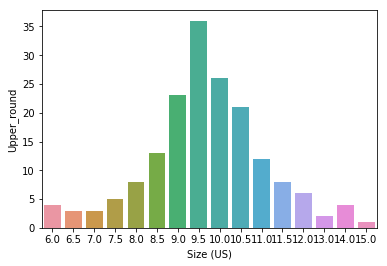

In [209]:
sns.barplot(x=df_men_US_16_mon.index,y='Upper_round',data=df_men_US_16_mon)